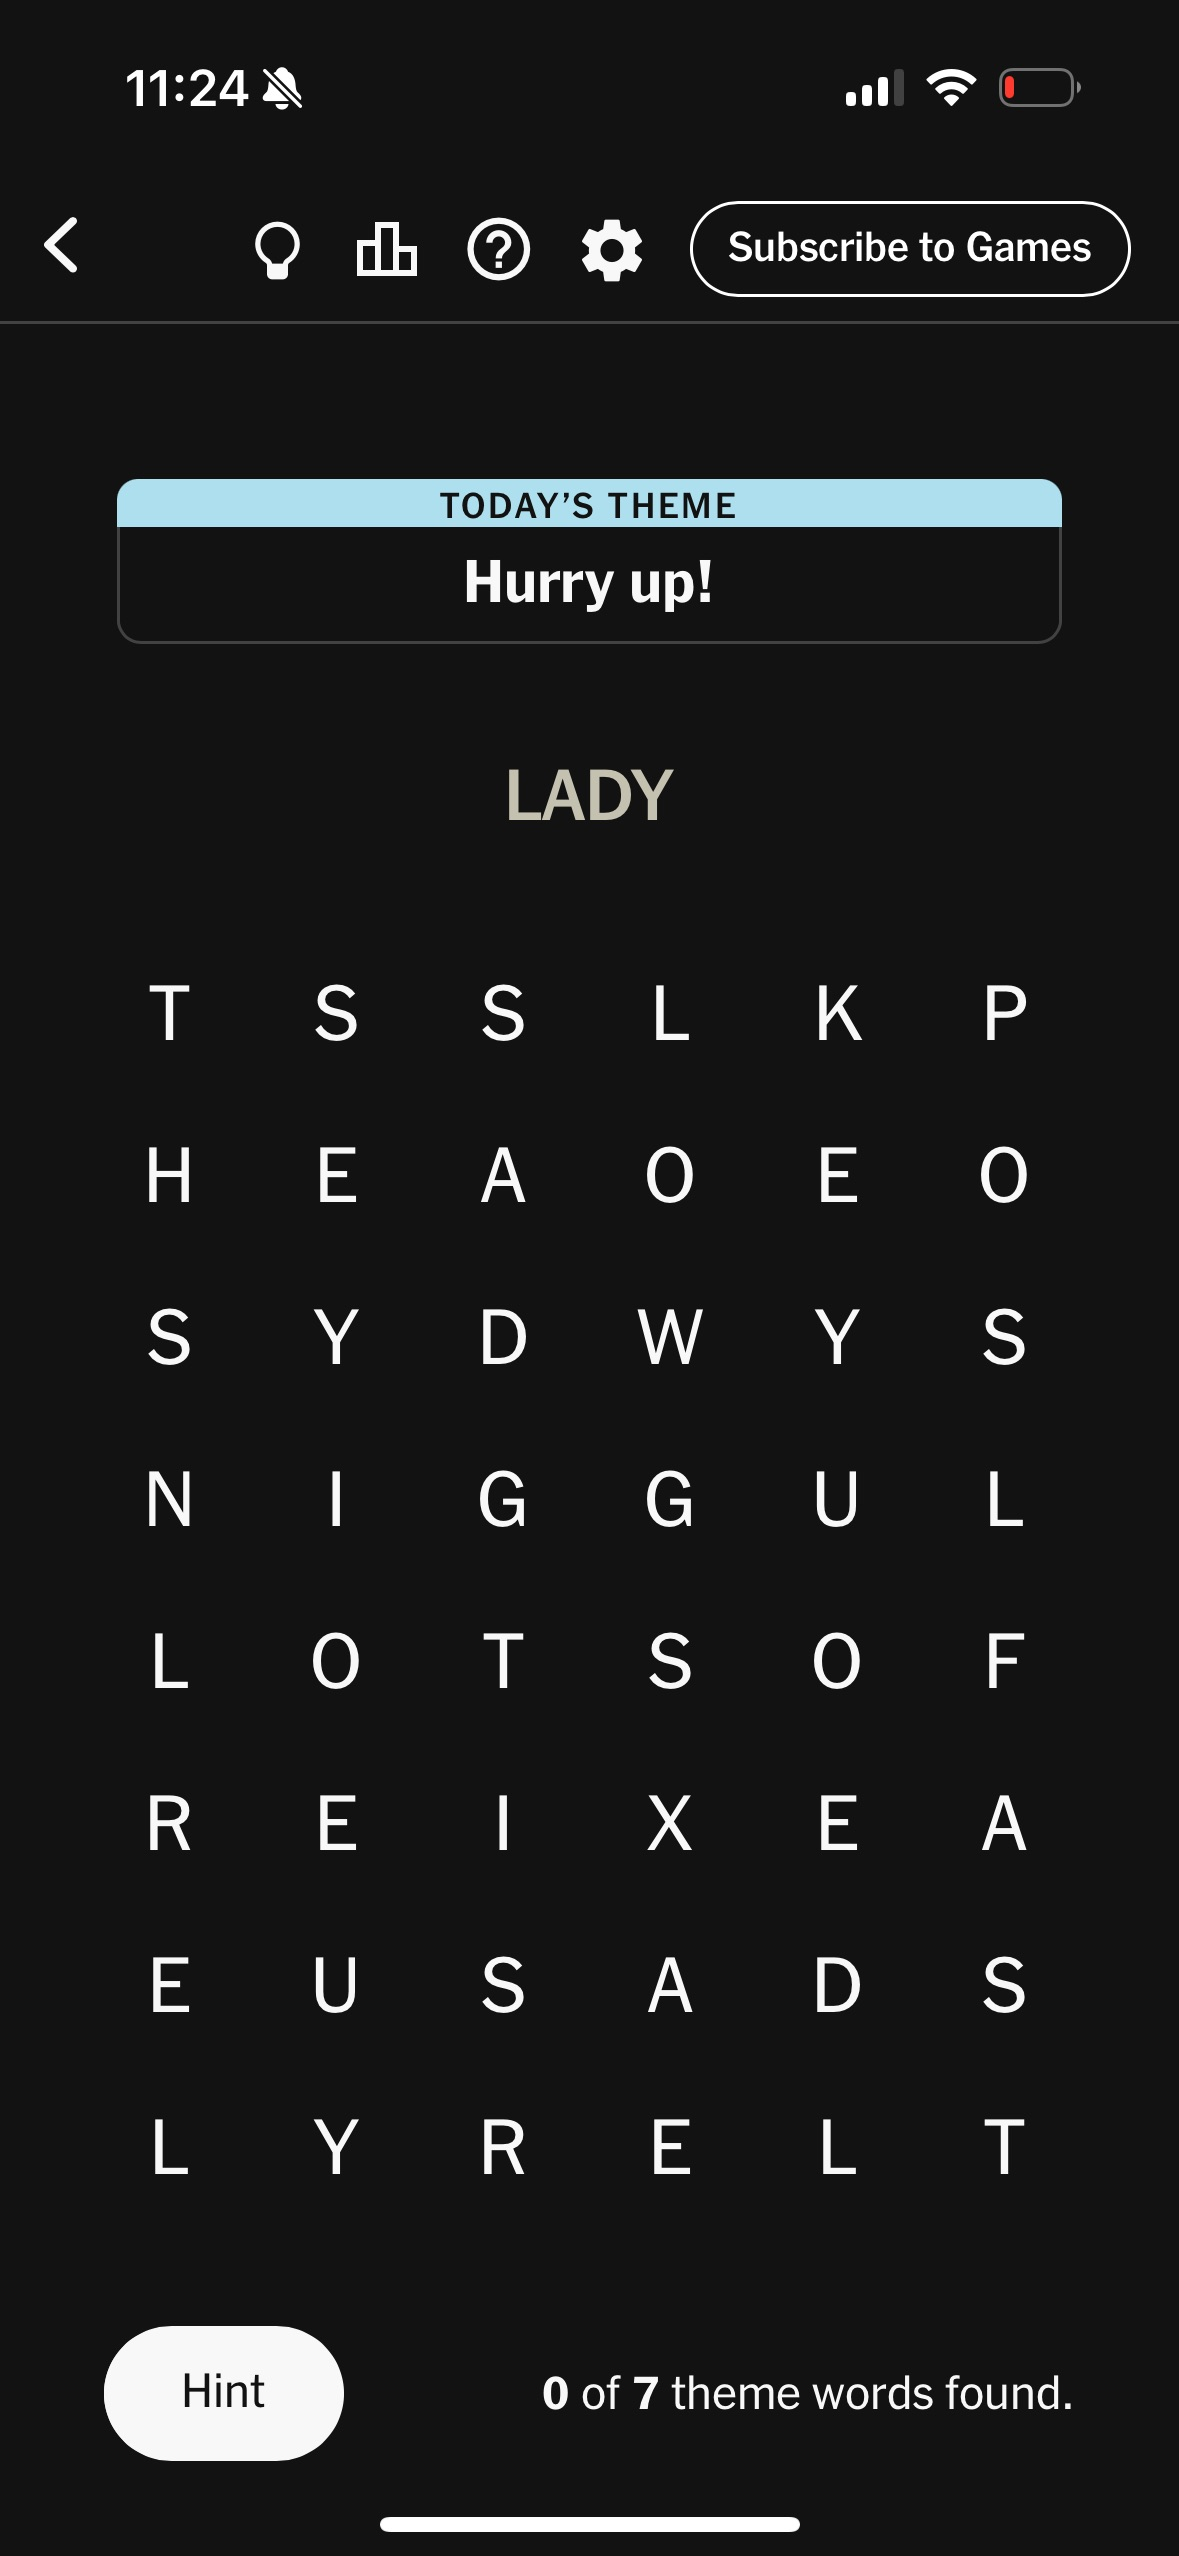

In [2]:
from PIL import Image

screenshot = Image.open("./puzzles/2025-09-14.jpeg")
screenshot

Created a 8x6 grid of 170x170px images
Total images: 48


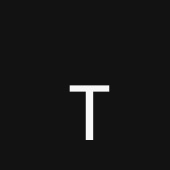

In [ ]:
# Crop an 8x6 grid of 170px square images, starting at top-left position (70, 900)
grid_images = []
start_x, start_y = 80, 900
cell_size = 170
rows, cols = 8, 6

for row in range(rows):
    row_images = []
    for col in range(cols):
        # Calculate the position for this cell
        left = start_x + col * cell_size
        top = start_y + row * cell_size
        right = left + cell_size
        bottom = top + cell_size

        # Crop the cell from the screenshot
        cell_image = screenshot.crop((left, top, right, bottom))
        row_images.append(cell_image)

    grid_images.append(row_images)

# Display the grid dimensions
print(f"Created a {rows}x{cols} grid of {cell_size}x{cell_size}px images")
print(f"Total images: {len(grid_images) * len(grid_images[0])}")

# Optionally display the first cell to verify
grid_images[0][0]

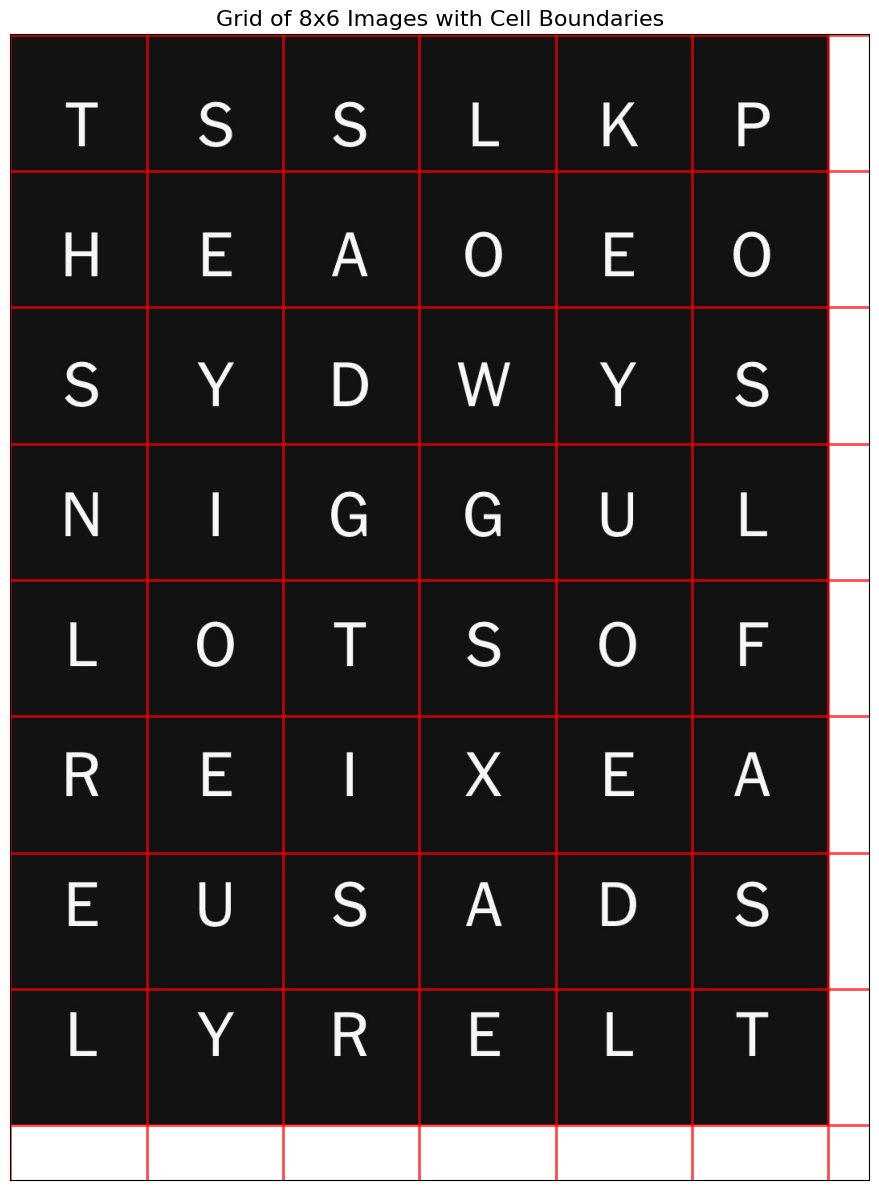

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure to display the entire grid
fig, ax = plt.subplots(1, 1, figsize=(16, 12))

# Create a large canvas to hold all images
total_width = cols * cell_size
total_height = rows * cell_size
canvas = np.zeros((total_height, total_width, 3), dtype=np.uint8)

# Place each image in the canvas
for row in range(rows):
    for col in range(cols):
        # Calculate position in the canvas
        y_start = row * cell_size
        y_end = y_start + cell_size
        x_start = col * cell_size
        x_end = x_start + cell_size

        # Convert PIL image to numpy array and place it in canvas
        img_array = np.array(grid_images[row][col])
        canvas[y_start:y_end, x_start:x_end] = img_array

# Display the canvas
ax.imshow(canvas)

# Draw grid lines to delineate each cell
# Vertical lines
for col in range(cols + 1):
    x = col * cell_size
    ax.axvline(x=x, color="red", linewidth=2, alpha=0.7)

# Horizontal lines
for row in range(rows + 1):
    y = row * cell_size
    ax.axhline(y=y, color="red", linewidth=2, alpha=0.7)

# Remove axis ticks and labels for cleaner display
ax.set_xticks([])
ax.set_yticks([])
ax.set_title(f"Grid of {rows}x{cols} Images with Cell Boundaries", fontsize=16)

# Adjust layout and display
plt.tight_layout()
plt.show()


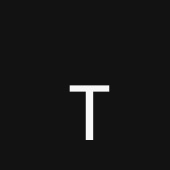

In [5]:
grid_images[0][0]

In [ ]:
import pytesseract

pytesseract.image_to_string(
    grid_images[0][0],
    config="-c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ --psm 10",
)

''

In [ ]:
# from transformers import CLIPProcessor, CLIPModel
# import torch

# # Load the model and processor
# model = CLIPModel.from_pretrained("tanganke/clip-vit-base-patch32_emnist_letters")
# processor = CLIPProcessor.from_pretrained("tanganke/clip-vit-base-patch32_emnist_letters")

# # Load an image (replace with your image path)
# image = grid_images[0][0]

# # Define text labels for letters
# text_labels = ["letter A", "letter B", "letter C"]  # Add more as needed

# # Process inputs
# inputs = processor(text=text_labels, images=image, return_tensors="pt", padding=True)

# # Get predictions
# with torch.no_grad():
#     outputs = model(**inputs)
#     logits_per_image = outputs.logits_per_image
#     probs = logits_per_image.softmax(dim=1)

# # Print results
# for i, label in enumerate(text_labels):
#     print(f"{label}: {probs[0][i]:.4f}")

/Users/nimo.beeren/Development/strands-solver/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
You are using a model of type clip_vision_model to instantiate a model of type clip. This is not supported for all configurations of models and can yield errors.
Some weights of CLIPModel were not initialized from the model checkpoint at tanganke/clip-vit-base-patch32_emnist_letters and are newly initialized: ['logit_scale', 'text_model.embeddings.position_embedding.weight', 'text_model.embeddings.token_embedding.weight', 'text_model.encoder.layers.0.layer_norm1.bias', 'text_model.encoder.layers.0.layer_norm1.weight', 'text_model.encoder.layers.0.layer_norm2.bias', 'text_model.encoder.layers.0.layer_norm2.weight', 'text_model.encoder.layers.0.mlp.fc1.bias', 'text_model.encoder.layers.0.mlp.fc1.weight', 't

OSError: Can't load image processor for 'tanganke/clip-vit-base-patch32_emnist_letters'. If you were trying to load it from 'https://huggingface.co/models', make sure you don't have a local directory with the same name. Otherwise, make sure 'tanganke/clip-vit-base-patch32_emnist_letters' is the correct path to a directory containing a preprocessor_config.json file

In [ ]:
from dictionary import load_dictionary

wordset = load_dictionary()
wordlist = sorted(wordset)

In [ ]:
import bisect


def is_word_prefix(q):
    q = q.upper()
    i = bisect.bisect_left(wordlist, q)
    return i < len(wordlist) and wordlist[i].startswith(q)


is_word_prefix("childr")

True

In [ ]:
from nltk.corpus import words, wordnet as wn

len({lemma.name().upper() for syn in wn.all_synsets() for lemma in syn.lemmas()})

147306

In [ ]:
len(set(wn.all_lemma_names()))

147306

In [ ]:
len(
    {lemma.name().upper() for syn in wn.all_synsets() for lemma in syn.lemmas()}
    & {lemma.upper() for lemma in wn.all_lemma_names()}
)

147306

In [6]:
{lemma.name().upper() for syn in wn.all_synsets() for lemma in syn.lemmas()}

{'DESTALINIZE',
 'ADMISSION_PRICE',
 'SCOT',
 'WAREHOUSEMAN',
 'COURT_OF_LAW',
 'STERNWHEELER',
 'CLICK',
 'PUGNACIOUS',
 'OSCITANCE',
 'PORBEAGLE',
 'DIESEL_ENGINE',
 'MICROCOMPUTER',
 'CARPING',
 'IRESINE_HERBSTII',
 'BRIDE-GIFT',
 'UNAMBIGUOUSLY',
 'ERROR-PRONE',
 'UNIFICATION',
 'TOP_DOG',
 'ACQUAINTED',
 'SMOOTHIE',
 'MICROCYTIC_ANEMIA',
 'UNSUPPORTIVE',
 'DENIAL',
 'FLOODHEAD',
 'DRAMATIZE',
 'ENGLISH_ELM',
 'FOLK_ART',
 'IRON_CAGE',
 'HEMATIC',
 'BREN_GUN',
 'PRESENT_PROGRESSIVE',
 'LEONCITA',
 'BORAGE',
 'ICHTHYOSAURIDAE',
 'CRIMINALNESS',
 'HYDRAZOITE',
 'WHOLE_TONE',
 "ST_MARTIN'S_DAY",
 'NEEDFULLY',
 'ENFEEBLING',
 'KHAMA',
 'ANALYSIS',
 'GRISLY',
 'SACRAL_VEIN',
 'SEMISOFT',
 'BLUE_CAT',
 'COLONISER',
 'FLEA',
 'MEDITERRANEAN_SNAPDRAGON',
 'POUNDS_PER_SQUARE_INCH',
 'KAREN_HORNEY',
 'COMMON_FIG',
 'SITUATION',
 'OBTUSENESS',
 'ODDNESS',
 'IN_HIDING',
 'BLACK-TAILED_DEER',
 'STRAIGHT-FLUTED_DRILL',
 'FITNESS',
 'SWIM',
 'FAMILY_MURIDAE',
 'FOOD_BANK',
 'DAL',
 'ORATE',
 'SUC

In [5]:
set(wn.all_lemma_names())

{'kamasutra',
 'acinic',
 'luculent',
 'hassium',
 'logistic_support',
 'gordian_knot',
 'lena_horne',
 'lorry',
 'wood_aster',
 'disorganization',
 'post-rotational_nystagmus',
 'callus',
 'crown_land',
 'sweetpea',
 "western_prince's_pine",
 'minutes',
 'caranx_hippos',
 'great_knapweed',
 'stingless',
 'oncidium_papilio_kramerianum',
 'paleacrita',
 'acanthisittidae',
 'weeds',
 'dionaea_muscipula',
 'elaphure',
 'battle_of_maldon',
 'minaret',
 'torrent',
 'scrub_palmetto',
 'waterhouse-friderichsen_syndrome',
 'duce',
 'peachwood',
 'regalecus_glesne',
 'grits',
 'speedwell',
 'shield_of_david',
 'condign',
 'optical_condenser',
 'bump_around',
 'graptophyllum',
 'melted',
 'feel_out',
 'tea_garden',
 'limacine',
 'swimmeret',
 'false_verdict',
 'ray_bradbury',
 'doolittle',
 'arteria_temporalis_anterior',
 'overcall',
 'hydrocephalic',
 'ibert',
 'organic_light-emitting_diode',
 'limenitis_astyanax',
 'paper_mulberry',
 'rhd',
 'korean_velvet_grass',
 'shunning',
 'ockham',
 'gou

In [ ]:
from dictionary import load_dictionary

old = load_dictionary()
new = {
    word.upper()
    for word in set(words.words()) | set(wn.all_lemma_names())
    if word.isalpha() and word.isascii()
}

print(len(old))
print(len(old & new))

253787
253787


In [ ]:
from dictionary import load_dictionary

words = load_dictionary()
print("ZIPLINING" in words)

False
